In [ ]:
print("""
project                                //root path
├─.ipynb_checkpoints  
├─data                              //Train and test dataset.
│  ├─Tmp_Data                     //Create a Tmp_Data directory                                      
│  ├─GTSRB_Final_Test_Images  
│  │  └─GTSRB  
│  │      └─Final_Test  
│  │          └─Images            //The ppm picture of test set.
│  └─GTSRB_Final_Training_Images  
│      └─GTSRB  
│          └─Final_Training  
│              └─Images  
│                  ├─00000        //The ppm picture of train set of first category.
│                  ├─00001        //...
│                  ├─00002
│                  ├─00003
│                  ├─00004
│                  ├─00005
│                  ├─00006
│                  ├─00007
│                  ├─00008
│                  ├─00009
│                  ├─00010
│                  ├─00011
│                  ├─00012
│                  ├─00013
│                  ├─00014
│                  ├─00015
│                  ├─00016
│                  ├─00017
│                  ├─00018
│                  ├─00019
│                  ├─00020
│                  ├─00021
│                  ├─00022
│                  ├─00023
│                  ├─00024
│                  ├─00025
│                  ├─00026
│                  ├─00027
│                  ├─00028
│                  ├─00029
│                  ├─00030
│                  ├─00031
│                  ├─00032
│                  ├─00033
│                  ├─00034
│                  ├─00035
│                  ├─00036
│                  ├─00037
│                  ├─00038
│                  ├─00039
│                  ├─00040
│                  ├─00041
│                  └─00042
└─pictureOutput //The picture we draw  #Create a pictureOutput directory
""")


project                                //root path
├─.ipynb_checkpoints  
├─data                              //Train and test dataset.
│  ├─Tmp_Data                     //Create a Tmp_Data directory                                      
│  ├─GTSRB_Final_Test_Images  
│  │  └─GTSRB  
│  │      └─Final_Test  
│  │          └─Images            //The ppm picture of test set.
│  └─GTSRB_Final_Training_Images  
│      └─GTSRB  
│          └─Final_Training  
│              └─Images  
│                  ├─00000        //The ppm picture of train set of first category.
│                  ├─00001        //...
│                  ├─00002
│                  ├─00003
│                  ├─00004
│                  ├─00005
│                  ├─00006
│                  ├─00007
│                  ├─00008
│                  ├─00009
│                  ├─00010
│                  ├─00011
│                  ├─00012
│                  ├─00013
│                  ├─00014
│                  ├─00015
│             

## Necessary imports

In [ ]:
# Import required modules
import numpy as np
import os
import sys
import random
from datetime import datetime
import pickle
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import matplotlib
matplotlib.use('Agg')                                                           #For frontend
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tqdm                                                                     #Progress bar
import warnings
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical                               #For One Hot Encoding

## Defining Common Variables and Functions

In [ ]:
def load_npy(directory, name="data"):
    '''
    Function
    ----------
    Load data saved as npy format.
    
    Parameters
    ----------
    directory : String
    The npy file address.
    name:String
    the name of the npy file.
    
    Return
    ----------
    numpy array from npy file.

    '''
    name = str(name)
    try:
        print( name + ' loading···')
        data = np.load(directory, allow_pickle=True)
        print( name + ' loading succeeded')
        return data

    except:
        print(name + 'not exist!')
        return None

In [ ]:
def ppm2numpy(directory):
    '''
    Function
    ----------
    Convert the ppm pictures in the directory into a numpy array,and return an array with the whole list of pictures.
    
    Parameters
    ----------
    directory : String
    
    Return
    ----------
    numpy array whose items are decoded ppm pictures

    '''
    files_all = os.listdir(directory)
    files = []
    for file in files_all:
        if ".ppm" in file:
            files.append(plt.imread(os.path.join(directory,file))) 
    return np.array(files, dtype=object)

In [ ]:
def plot_picture(picture,text):
    """
    Function
    ----------
    Draw a picture, given an array object.
    
    Parameters
    ----------
    picture: np.array
    the array object of a picture
    text:String
    the title of the picture
    
    Return
    ----------
    None
    
    """
    plt.figure()
    plt.imshow(picture, cmap = 'gray')
    plt.title(text)
    plt.show()

# Since Google colab with Google cloud drive is used please load thses module before run the rest of sequence

In [ ]:
# Read the README file and make changes in the folder name accordingly
from google.colab import drive   
drive.mount('/content/drive',force_remount=True)

train_data_dir = "/content/drive/MyDrive/Traffic Sign Classification/GTSRB/Final_Training/Images"
test_data_dir = "/content/drive/MyDrive/Traffic Sign Classification/GTSRB/Final_Test/Images"
Tmp_Data_dir = "/content/drive/MyDrive/Traffic Sign Classification/GTSRB/Tmp_Data"      
pictureOutput = "/content/drive/MyDrive/Traffic Sign Classification/GTSRB/pictureOutput"

Mounted at /content/drive


# Basic information of data set

Category label

The German Traffic Sign Recognition Benchmark (GTSRB) contains 43 types of traffic signs. Each sign corresponds to a unique index and is called a category. And the following cell shows the comparison between category and index. For example, category index 0 corresponds to the traffic sign "Max Speed 20 km/h", category index 1 corresponds to the traffic sign "Max Speed 30 km/h", etc.

In [ ]:
#Traffic signs
#The index of sign corresponds to the name of the folder where the picture is located

category_names = [
    "Max Speed 20 km/h",
    "Max Speed 30 km/h",
    "Max Speed 50 km/h",
    "Max Speed 60 km/h",
    "Max Speed 70 km/h",
    "Max Speed 80 km/h",
    "End of 80 km/h zone",
    "Max Speed 100 km/h",
    "Max Speed 120 km/h",
    "No passing",
    "No passing for vehicles over 3.5 tonnes",
    "Priority",
    "Priority road",
    "Yield",
    "Stop",
    "Road closed",
    "Vehicles over 3.5 tonnes prohibited",
    "Do not enter",
    "General danger",
    "Left curve",
    "Right curve",
    "Double curve",
    "Uneven road surface",
    "Slippery when wet or dirty",
    "Road narrows",
    "Roadworks",
    "Traffic signals ahead",
    "Pedestrians",
    "Watch for children",
    "Bicycle crossing",
    "Ice - snow",
    "Wild animal crossing",
    "End of all restrictions",
    "Turn right ahead",
    "Turn left ahead",
    "Ahead only",
    "Ahead or turn right only",
    "Ahead or turn left only",
    "Pass by on right",
    "Pass by on left",
    "Roundabout",
    "End of no passing zone",
    "End of no passing zone for trucks"
    ]
for i,item in enumerate(category_names):
  print("{1}---{0}".format(item,i))

0---Max Speed 20 km/h
1---Max Speed 30 km/h
2---Max Speed 50 km/h
3---Max Speed 60 km/h
4---Max Speed 70 km/h
5---Max Speed 80 km/h
6---End of 80 km/h zone
7---Max Speed 100 km/h
8---Max Speed 120 km/h
9---No passing
10---No passing for vehicles over 3.5 tonnes
11---Priority
12---Priority road
13---Yield
14---Stop
15---Road closed
16---Vehicles over 3.5 tonnes prohibited
17---Do not enter
18---General danger
19---Left curve
20---Right curve
21---Double curve
22---Uneven road surface
23---Slippery when wet or dirty
24---Road narrows
25---Roadworks
26---Traffic signals ahead
27---Pedestrians
28---Watch for children
29---Bicycle crossing
30---Ice - snow
31---Wild animal crossing
32---End of all restrictions
33---Turn right ahead
34---Turn left ahead
35---Ahead only
36---Ahead or turn right only
37---Ahead or turn left only
38---Pass by on right
39---Pass by on left
40---Roundabout
41---End of no passing zone
42---End of no passing zone for trucks


In [ ]:
num_of_categories=len(category_names)                                           #Total number of categories
print(num_of_categories)

43


##Training set

Build training dataset and get the length, width, category and information of pictures in training set. Because convert the picture to numpy will take a long time, so the converted data will be saved and can be called directly when it is used next time.

In [ ]:
#Check whether the length, width and category data of the training set exist. If so, read it directly. Otherwise, generate and save it

if "x_train.npy" in os.listdir(Tmp_Data_dir) and "y_train.npy" in os.listdir(Tmp_Data_dir):
    x_train = load_npy(os.path.join(Tmp_Data_dir,"x_train.npy"), name="x_train.npy")
    y_train = load_npy(os.path.join(Tmp_Data_dir,"y_train.npy"), name="y_train.npy")
else:
    y_train = []
    x_train = []
    for folder in os.listdir(train_data_dir):
        images = ppm2numpy(os.path.join(train_data_dir,folder))
        x_train.append(images)
        y_train.extend([int(folder)]*len(images))
    x_train = np.concatenate(x_train, axis=0, out=None, dtype=None, casting="same_kind")
    np.save(os.path.join(Tmp_Data_dir,"x_train.npy") , x_train)
    np.save(os.path.join(Tmp_Data_dir,"y_train.npy"), y_train)
    
if "train_info.csv" not in os.listdir(Tmp_Data_dir) :
    train_info = {}
    widths = []
    heights = []
    for picture in x_train:
        widths.append(picture.shape[0])
        heights.append(picture.shape[1])
    train_info["Width"] = widths
    train_info["Height"] = heights
    train_info["IndexId"] = y_train

    train_info_df = pd.DataFrame(train_info)
    train_info_df.to_csv(os.path.join(Tmp_Data_dir, "train_info.csv"), index = False)
    print(train_info_df.head(5))

x_train.npy loading···
x_train.npy loading succeeded
y_train.npy loading···
y_train.npy loading succeeded


## Testing set

Build training dataset and read the length, width, category and information of pictures in test set.

In [ ]:
#Check whether the length, width and category data of the test set exist.If so, read it directly. Otherwise, generate and save it

if "x_test.npy" in os.listdir(Tmp_Data_dir) and "y_test.npy" in os.listdir(Tmp_Data_dir):
    x_test = load_npy(os.path.join(Tmp_Data_dir,"x_test.npy"), name="x_test.npy")
    y_test = load_npy(os.path.join(Tmp_Data_dir,"y_test.npy"), name="y_test.npy")
else:
    x_test = ppm2numpy(test_data_dir)
    y_test =  np.array(pd.read_csv("/content/drive/MyDrive/Traffic Sign Classification/GTSRB/GT-final_test.csv",sep=";")["ClassId"])
    np.save(os.path.join(Tmp_Data_dir,"x_test.npy") , x_test)
    np.save(os.path.join(Tmp_Data_dir,"y_test.npy"), y_test)

x_test.npy loading···
x_test.npy loading succeeded
y_test.npy loading···
y_test.npy loading succeeded


## show some picture in test set, given an array object:

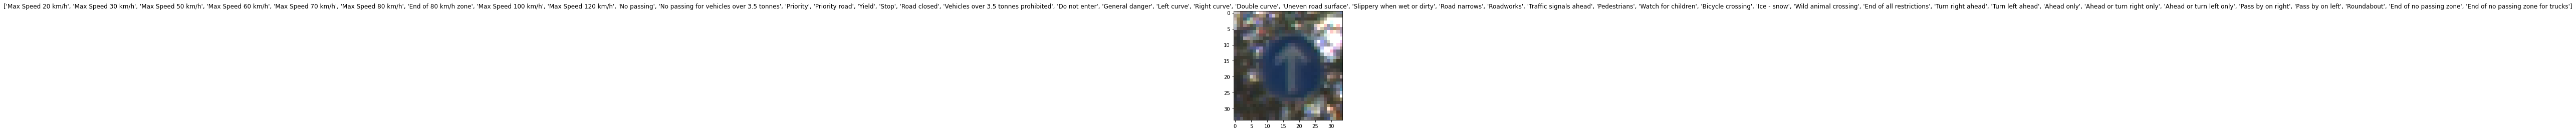

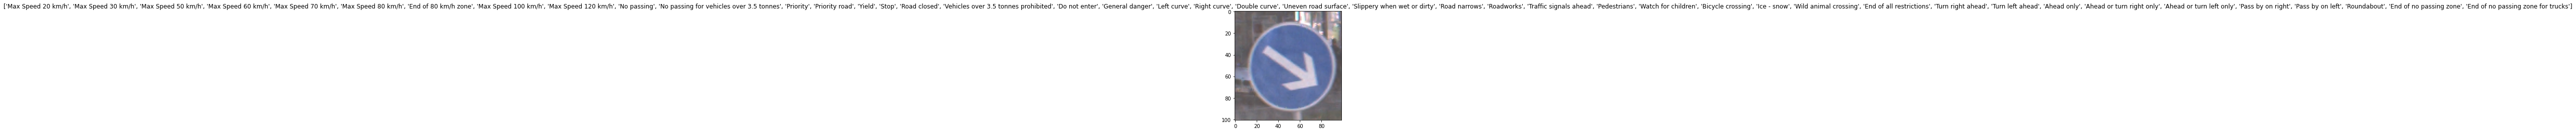

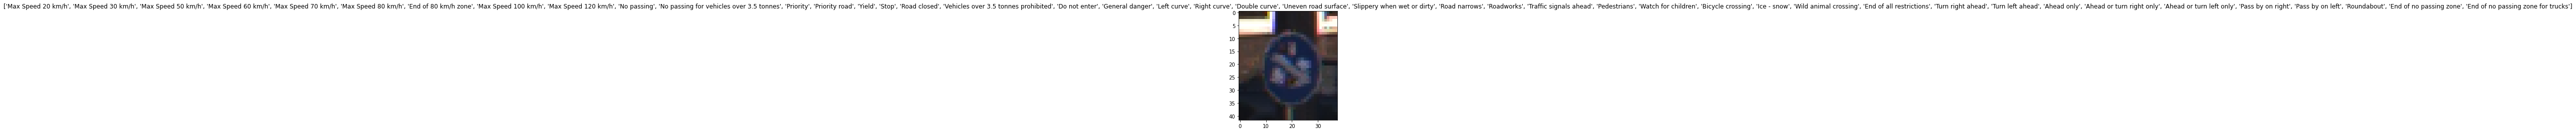

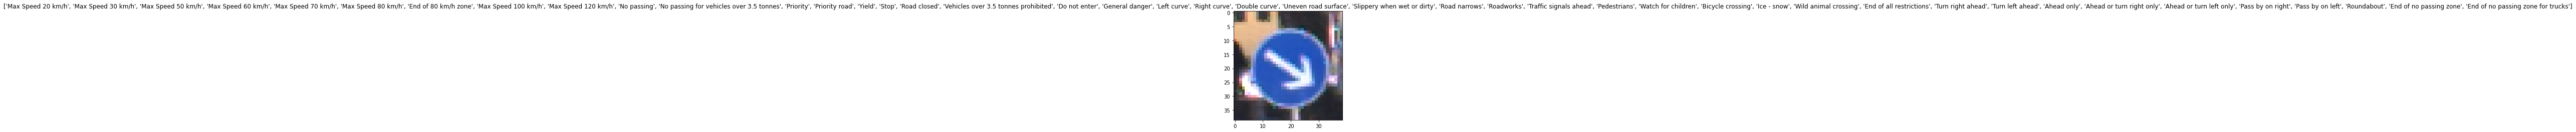

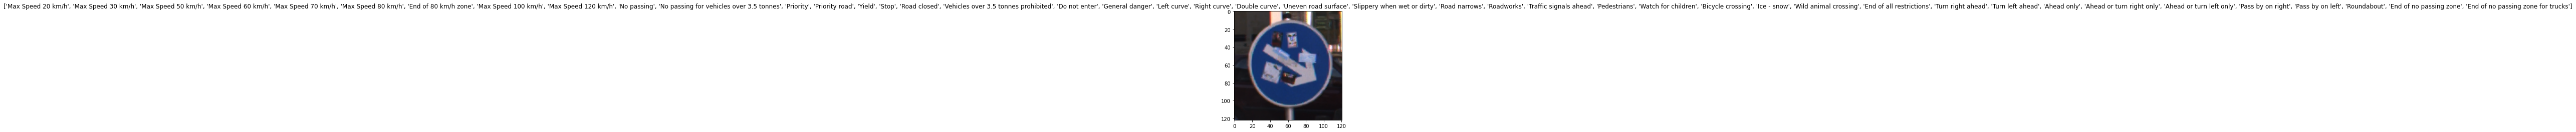

In [ ]:
for i in range(5):
    plot_picture(x_test[i],category_names)

# Descriptive Analysis

The scope of this section is to get a general idea of the whole dataset.

1,We will load the the info data and show some examples of train and test data.

2.We will start creating a graph to see the length and width distribution of the pictures.

3.We will start creating a barplot to explore average length and width of pictures for each category

4.We will start creating a histogram to see how many pictures are available for each category.

## Loading of data

In [ ]:
train_df = pd.read_csv(os.path.join(Tmp_Data_dir, "train_info.csv"))
print(train_df.head())
test_df = pd.read_csv("/content/drive/MyDrive/Traffic Sign Classification/GTSRB/GT-final_test.csv",sep=";")
print(test_df.head())

   Width  Height  IndexId
0     38      39        1
1     39      39        1
2     33      33        1
3     38      37        1
4     98     105        1
    Filename  Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId
0  00000.ppm     53      54       6       5      48      49       16
1  00001.ppm     42      45       5       5      36      40        1
2  00002.ppm     48      52       6       6      43      47       38
3  00003.ppm     27      29       5       5      22      24       33
4  00004.ppm     60      57       5       5      55      52       11


# Data Visualizsation

Observe pictures randomly in the training set and test set

Inspect random pictures from the train directory for each category

plt.figure(figsize=(15,50))
category_nums = os.listdir(train_data_dir)
picture_loc = 1
for i,c in enumerate(category_nums):
    category = category_names[int(c)]
    imgs = [img for img in os.listdir(os.path.join(train_data_dir,c)) if ".ppm" in img]
    for j in range(1,4):
        plt.subplot(len(category_nums),3,picture_loc)
        picture_loc += 1
        img = random.choice(imgs)
        random_img_path = train_data_dir + c + "/" + img
        rand_img = imread(random_img_path)
        plt.imshow(rand_img)
        plt.xlabel(rand_img.shape[1], fontsize = 10)
        #width of image
        plt.ylabel(rand_img.shape[0], fontsize = 10)
        #height of image
        plt.title(category)
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.6, hspace=1)
plt.savefig(os.path.join(pictureOutput,"Inspect random pictures from the train directory for each category.png"))

Inspect 10 random pictures from the test directory

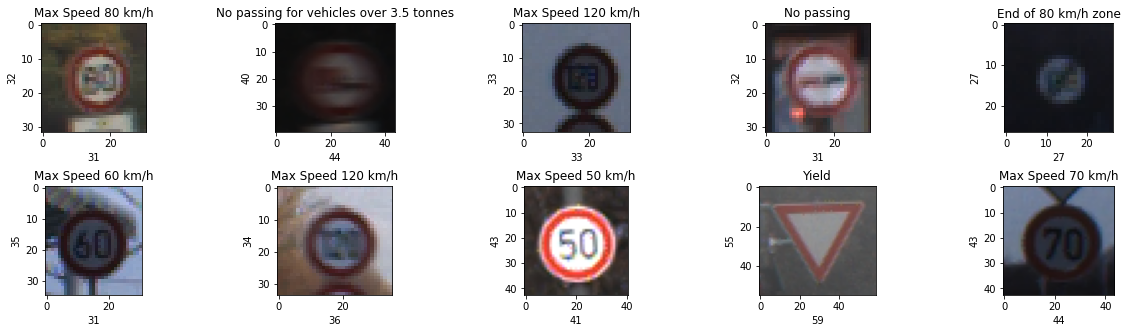

In [ ]:
imgs = [item for item in os.listdir(test_data_dir) if ".ppm" in item]
plt.figure(figsize=(20,5))
for i in range(1,11):
    plt.subplot(2,5,i)
    img = random.choice(imgs)
    rand_img = imread(os.path.join(test_data_dir,img))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    #width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)
    #height of image
    plt.title(category_names[test_df.ClassId.values[int(img.replace(".ppm",""))]])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.6, hspace=0.5)
plt.savefig(os.path.join(pictureOutput,"Inspect 10 random pictures from the test directory.png"))

## The width and height distribution of pictures

Create two lines to explore the width and Height distribution of all pictures


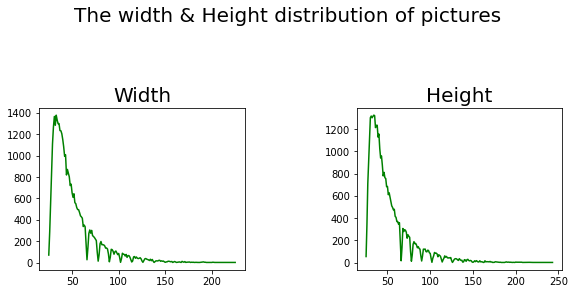

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i,item in enumerate(["Width","Height"]):
    tmp = fig.add_subplot(1, 2 , i+1)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    width_distribution = train_df.groupby([item]).count()
    tmp.plot(width_distribution.index, width_distribution["IndexId"], color = 'green')
    tmp.set_title(item, fontsize=20)
fig.tight_layout(pad=8.0)
fig.suptitle("The width & Height distribution of pictures", fontsize=20, y= 1.0)
plt.savefig(os.path.join(pictureOutput,"The width and height distribution of pictures.png"))
plt.show()

Create some lines to explore the width distribution of pictures per category:

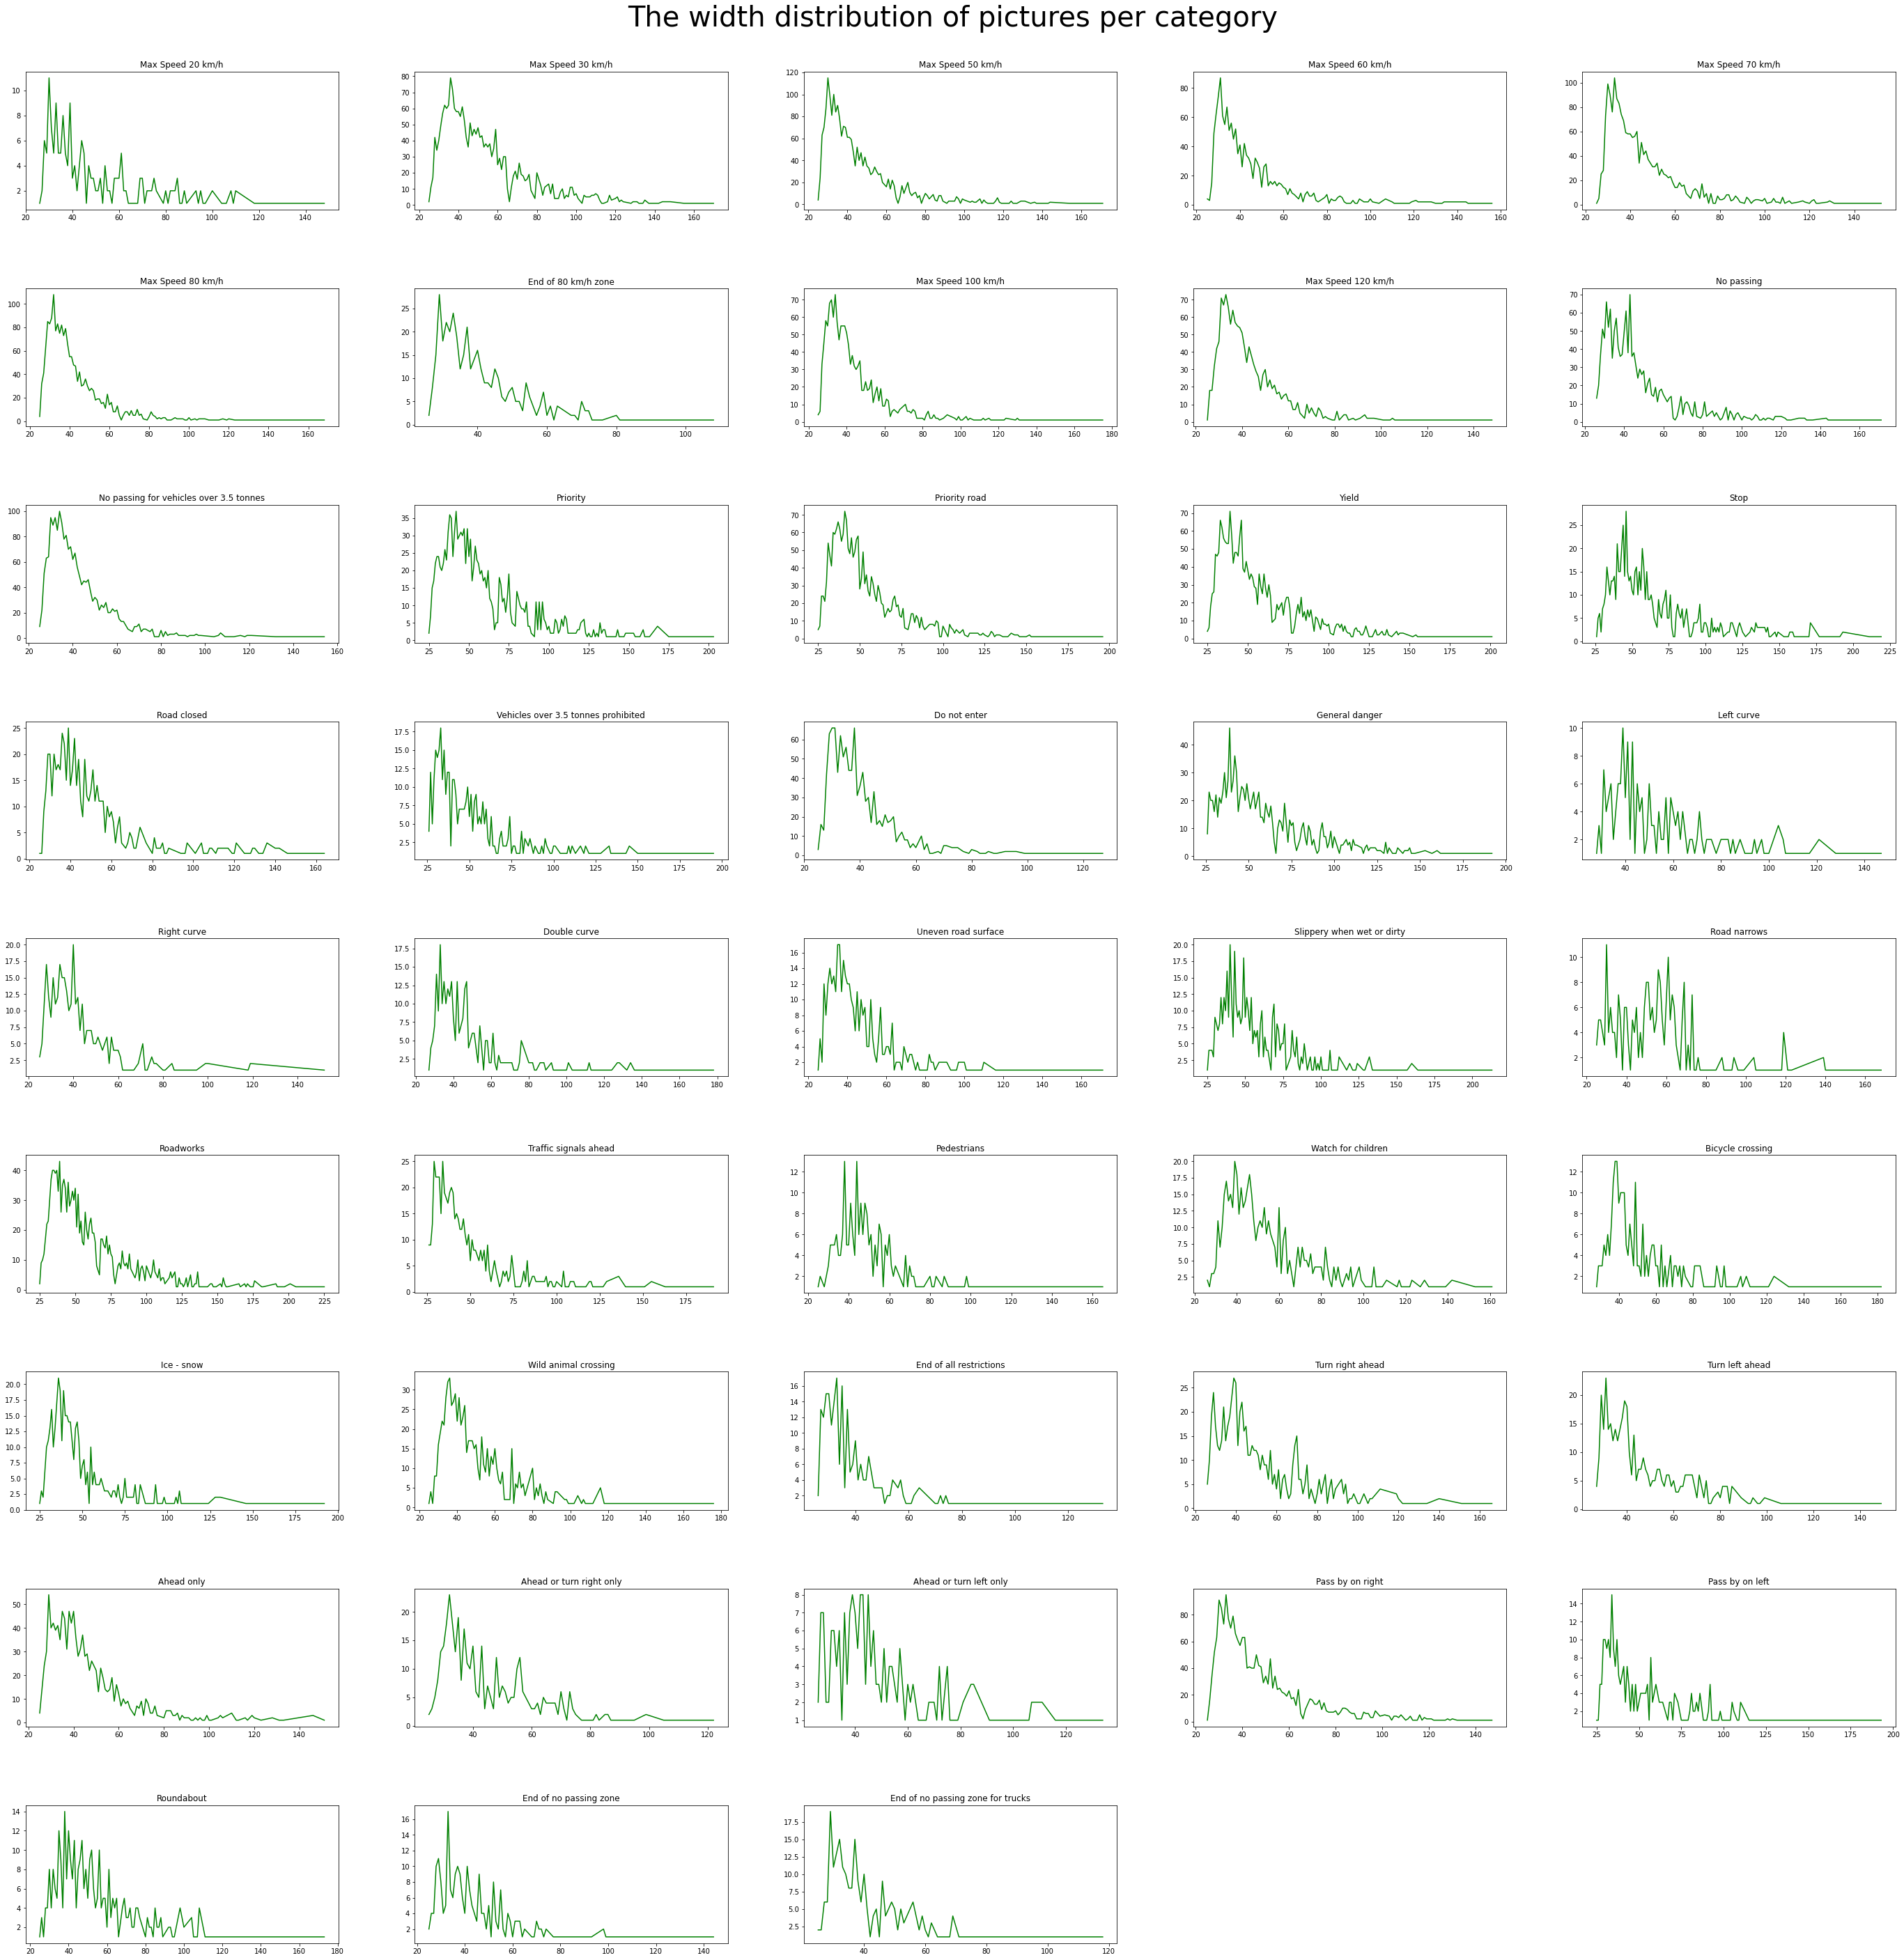

In [ ]:
df_width = train_df[["Width","IndexId"]]
df_width["Category"] = [category_names[item] for item in y_train]
fig = plt.figure(figsize=(25,25))

# Create a collection of axes names for the following subplot:
axes = [category for category in category_names]
for i in range(len(category_names)) :
    axes[i] = fig.add_subplot(9, 5 , i+1)
    fig.set_figheight(40)
    fig.set_figwidth(40)
    category = category_names[i]
    values = df_width[df_width.Category == category]
    tmp_data = values.groupby("Width").count()
    axes[i].plot(tmp_data.index, tmp_data["IndexId"], color = 'green')  
    axes[i].set_title(category_names[i])

fig.tight_layout(pad=8.0)
fig.suptitle("The width distribution of pictures per category", fontsize=40, y= 1.0)
plt.savefig(os.path.join(pictureOutput,"The width distribution of pictures per category.png"))
plt.show()

We can see that the length or width of the pictures is not exactly same, so we need to resize all the picture to the same size during the data processing.

## Number of pictures per category

At the this step we will create a barplot to explore number of pictures per category.

Train set:
 2     2250
1     2220
13    2160
12    2100
38    2070
Name: IndexId, dtype: int64
Test set:
 2     2250
1     2220
13    2160
12    2100
38    2070
Name: IndexId, dtype: int64


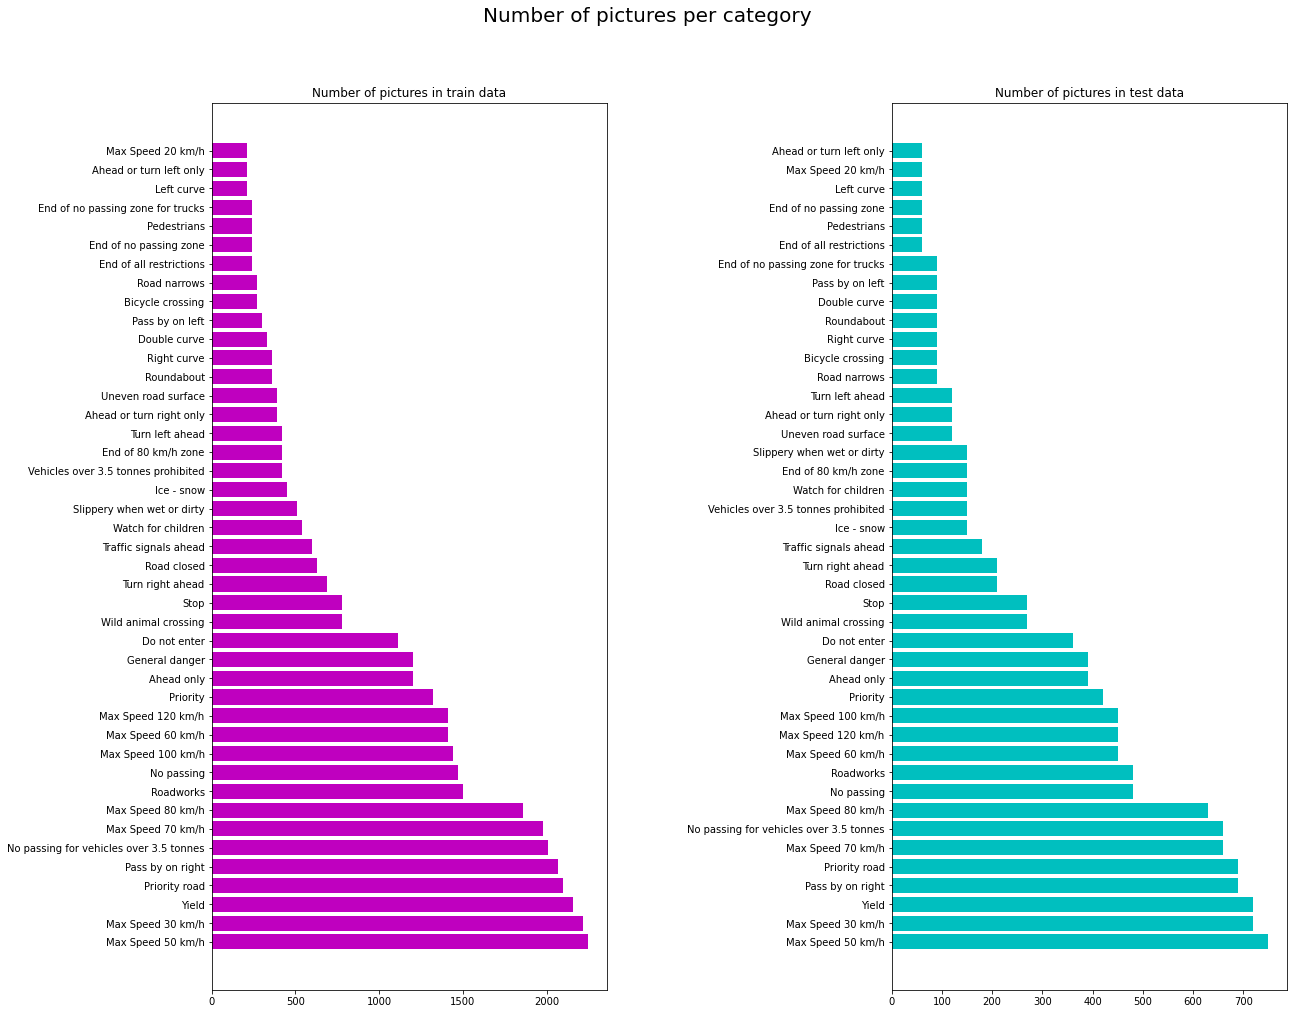

In [ ]:
#Count the number of pictures of each type

train_counts = train_df.IndexId.value_counts()
test_counts = test_df.ClassId.value_counts()
print("Train set:\n",train_counts.head())
print("Test set:\n",train_counts.head())

#Draw the number of pictures per category.
fig = plt.figure(figsize=(30, 25))
num_df = train_df.groupby("IndexId").count()
fig.set_figheight(15)
fig.set_figwidth(20)

#Train set
tmp = fig.add_subplot(1, 2 ,1)
tmp.barh(range(len(train_counts)), train_counts.values, color = 'm')
labels = [ category_names[i] for i in train_counts.index ]
tmp.set_yticks(range(len(train_counts)))
tmp.set_yticklabels(labels)
tmp.set_title("Number of pictures in train data")

#Test set
tmp = fig.add_subplot(1, 2 ,2)
tmp.barh(range(len(test_counts)), test_counts.values, color = 'c')
labels = [ category_names[i] for i in test_counts.index ]
tmp.set_yticks(range(len(test_counts)))
tmp.set_yticklabels(labels)
tmp.set_title("Number of pictures in test data")

fig.tight_layout(pad=8.0)
fig.suptitle("Number of pictures per category", fontsize=20, y= 1.0)
plt.savefig(os.path.join(pictureOutput,"Number of pictures per category.png"))
plt.show()

## Distribution of pixel intensity per category

Distribution of picture's average intensity per category

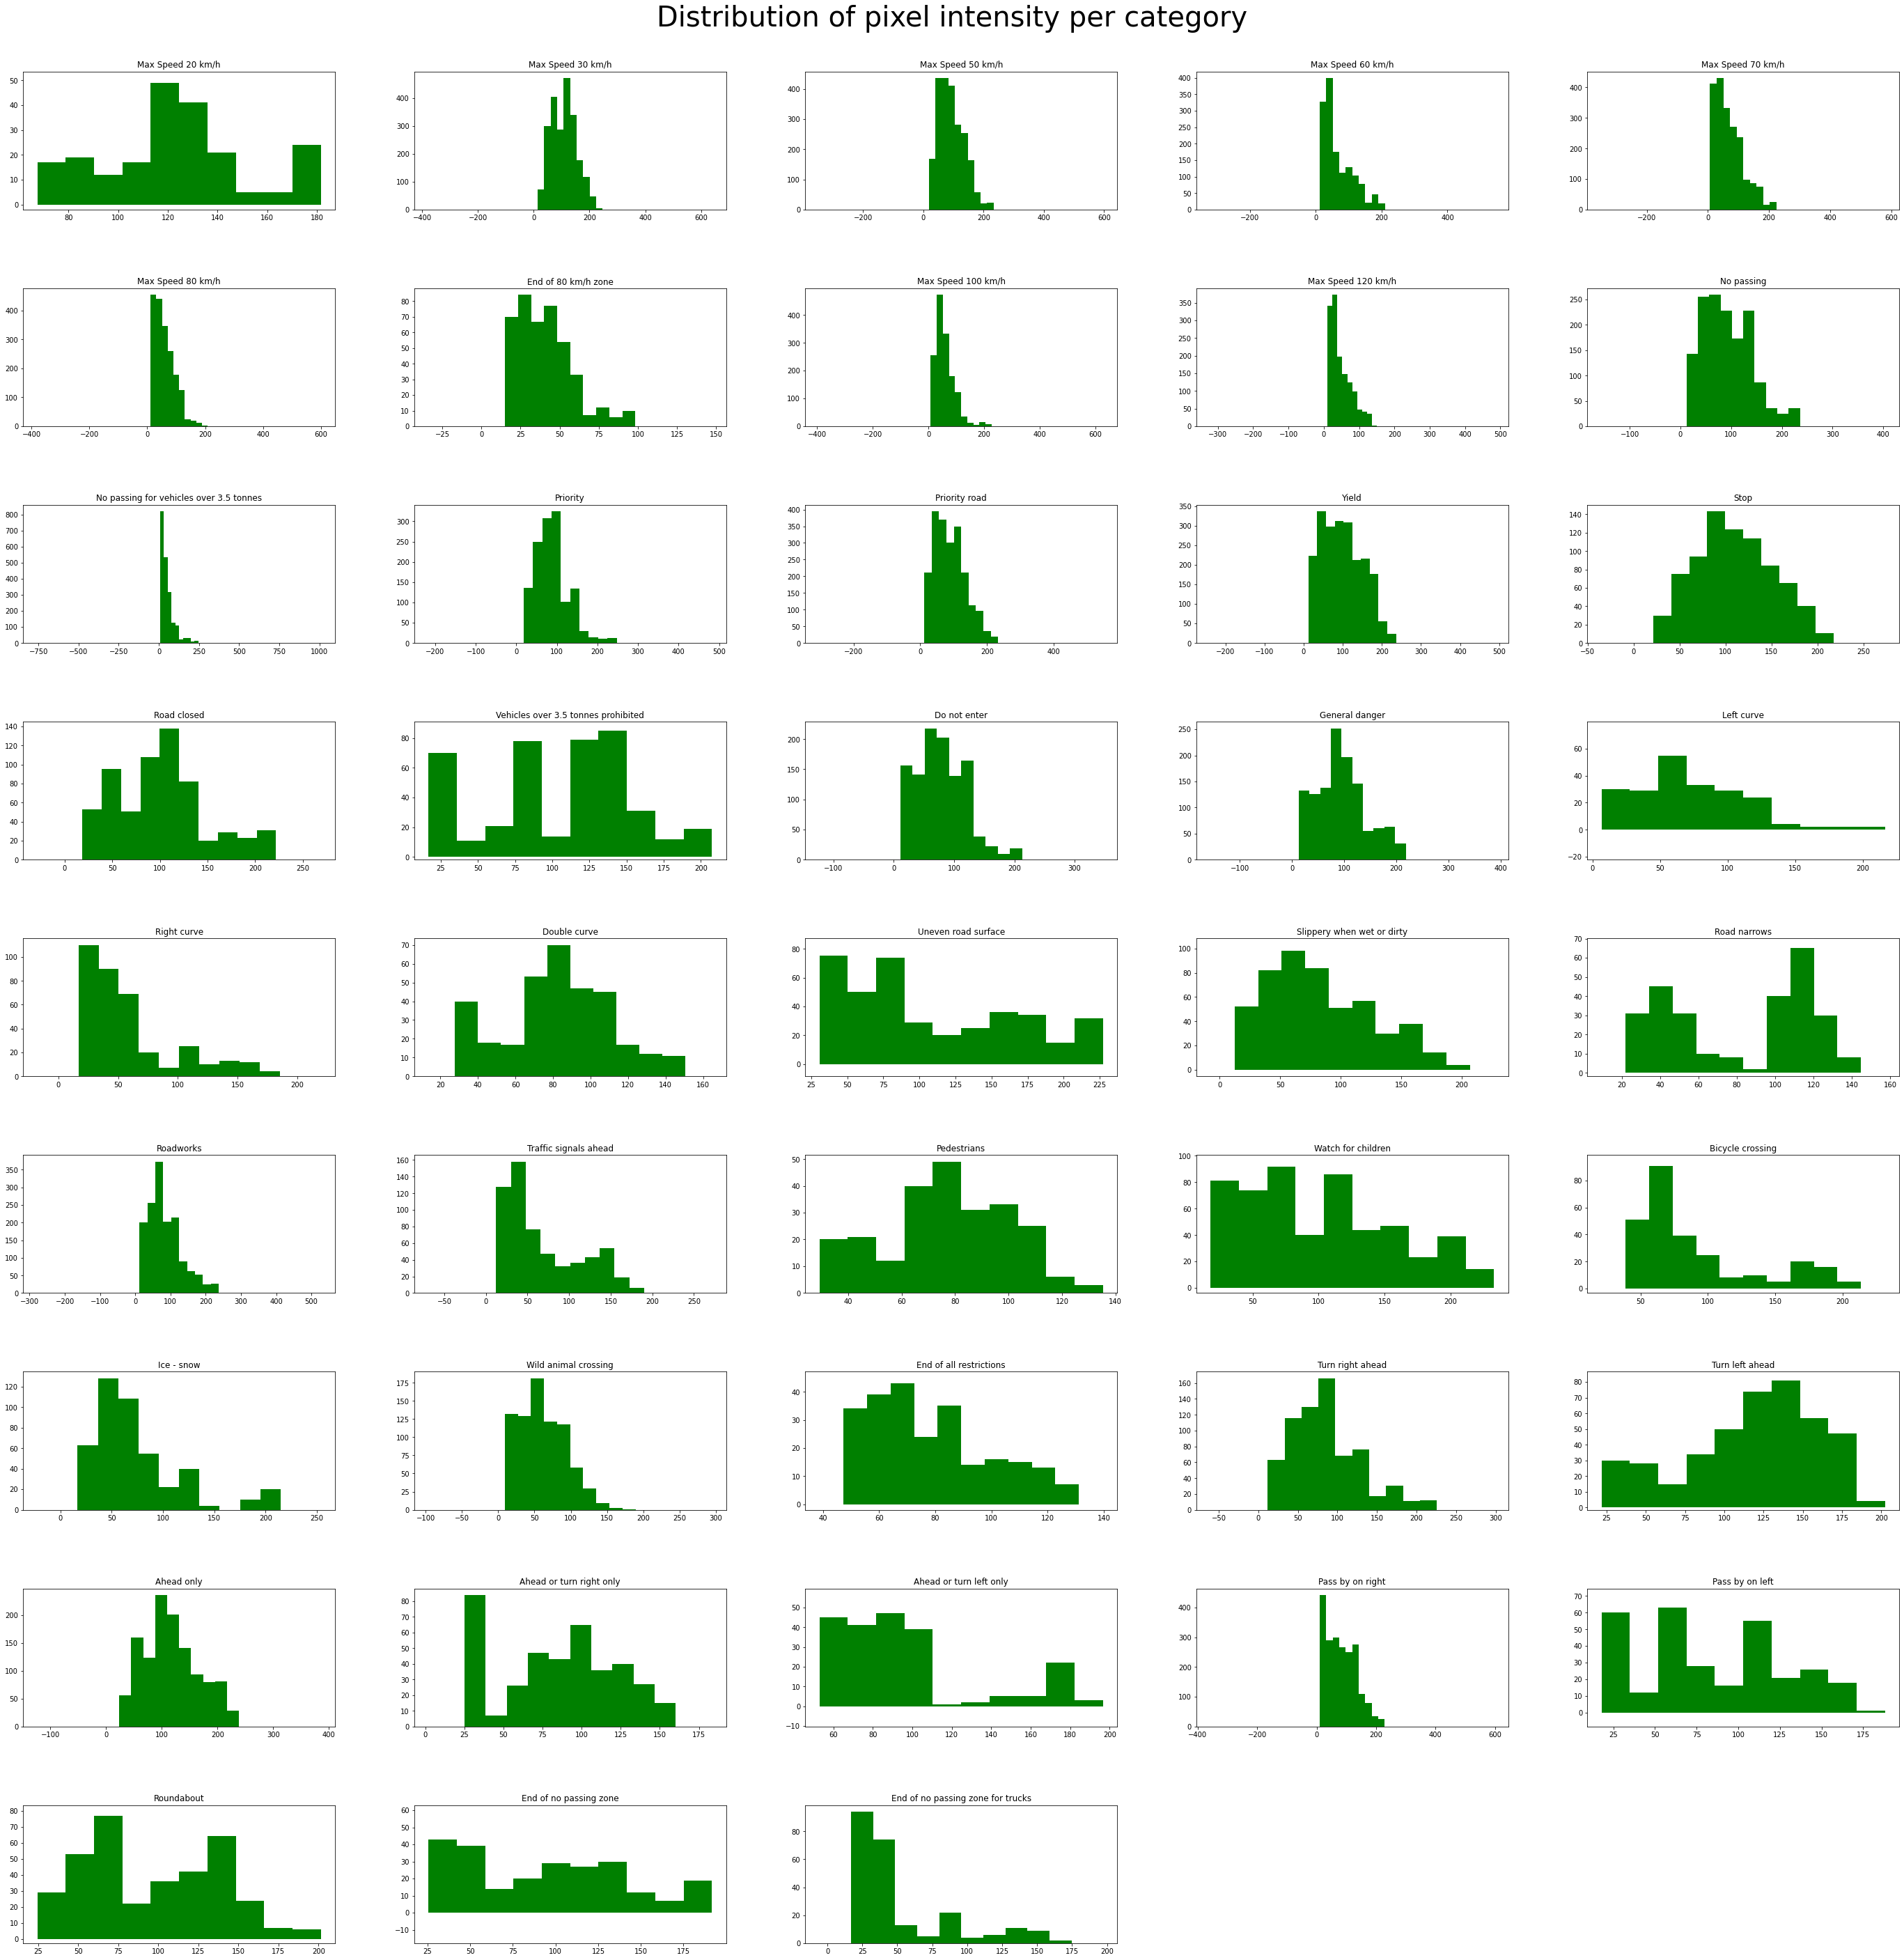

In [ ]:
#Draw the picture's average intensity per category

picture_means = [ picture.mean() for picture in x_train]
picture_df = pd.DataFrame( list(zip(picture_means, [category_names[item] for item in y_train])), columns=['Picture_means', 'Category']  )
fig = plt.figure(figsize=(25,25))
axes = [category  for category in category_names]
for i in range(len(category_names)) :  
    axes[i] = fig.add_subplot(9, 5 , i+1)    
    fig.set_figheight(40)
    fig.set_figwidth(40)
    category = category_names[i]
    values = picture_df[picture_df.Category == category]["Picture_means"]
    axes[i].hist([values], bins = 10, facecolor = 'g')
    axes[i].axis('equal')  
    axes[i].set_title(category_names[i])
fig.tight_layout(pad=8.0)
fig.suptitle("Distribution of pixel intensity per category", fontsize=40, y= 1.0)
plt.savefig(os.path.join(pictureOutput,"pixel intensity distribution.png"))
plt.show()

# Data Processing

## Loading of Training Data

Resizing and converting the images to get rid of the faulty images for efficient training

In [ ]:
#Pre-processing the Training data

train_data_dir="/content/drive/MyDrive/Traffic Sign Classification/GTSRB/Final_Training/Images" #redefining the data directory

category_nums=['00000','00001','00002','00003','00004','00005','00006','00007','00008','00009','00010','00011',
               '00012','00013','00014','00015','00016','00017','00018','00019','00020','00021','00022','00023','00024','00025','00026',
               '00027','00028','00029','00030','00031','00032','00033','00034','00035','00036','00037','00038','00039','00040','00041','00042']

#Must reference the folders by name

#Set desired height and width, inferred from the data exploration results
IMAGE_HEIGHT=35; IMAGE_WIDTH=35 

#Create an empty list for the preprocessed data
preprocessed_data=[]
broken_images=[]

for i in category_nums:                                                                 #Iterate over each folder name to get the images from each folder
    path=os.path.join(train_data_dir,i)                                                 #Path to each data folder (joins the quoted number and the general directory path)
    category_index=category_nums.index(i)                                               #Take the index values as arbitrary classification values
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)              #Convert to array, rgb data ~3x size of greyscale therefore convert to greyscale for less space used
        resized_image_array=cv2.resize(img_array,(IMAGE_HEIGHT,IMAGE_WIDTH))            #Take each image and resize to the same dimensions
        equalisation_image=cv2.equalizeHist(resized_image_array)                        #Histogram equalisation tachnique to fix contrast issues in the images - equalise all images to a standard contrast.
        #Alternate normalisation clause
        normalised_image_array=tf.keras.utils.normalize(equalisation_image,axis=1)      #Normalise the numbers between 0 and 1
        preprocessed_data.append([normalised_image_array, category_index])              #Add the fully processed data to the list
        
      except Exception as e:
        broken_images.append([img_array, category_index])                               #Pass over broken images

print("Length of preprocessed data of the training set is:", len(preprocessed_data))
print("Length of number of broken images is:", len(broken_images))

#Shuffle the data in order to stop neural network continuously predicting the same category one after the other
from random import shuffle
shuffle(preprocessed_data)
print(preprocessed_data)
     

Length of preprocessed data of the training set is: 39209
Length of number of broken images is: 43


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Dividing processed images into input variables and output variables

4


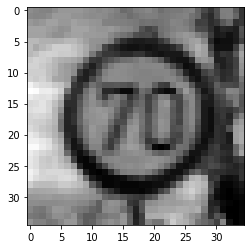

In [ ]:
x_train=[]                                                                       #Define empty lists
y_train=[]
for array, category in preprocessed_data:
  x_train.append(array)
  y_train.append(category)

plt.imshow(x_train[0],cmap='gray')                                              #This is the image
print(y_train[0])                                                               #This is the category the image falls under

In [ ]:
x_train=np.array(x_train).reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,1)                #Have to add '1' term for the dimension of greyscale
print("Shape of x_train is:", x_train.shape)
y_train=np.array(y_train)
print("Shape of x_train is:", y_train.shape)

Shape of x_train is: (39209, 35, 35, 1)
Shape of x_train is: (39209,)


## Loading of Test Data

In [ ]:
#Loading the test.csv file into a dataframe to get the category labels
y_test_df = pd.read_csv('/content/drive/MyDrive/Traffic Sign Classification/GTSRB/GT-final_test.csv', sep = ';') 

In [ ]:
# Performing the same loading and preprocessing technique to get the test data and later splitting the data into input and output variables
#Pre-processing the Test data

test_data_dir="/content/drive/MyDrive/Traffic Sign Classification/GTSRB/Final_Test/Images"        #Redefining the data directory


#Set desired height and width, inferred from the data exploration results
IMAGE_HEIGHT=35; IMAGE_WIDTH=35 

#Create an empty list for the preprocessed data
preprocessed_data_test=[]
broken_images_test=[]


for img in os.listdir(test_data_dir):
    try:
        
        img_array=cv2.imread(os.path.join(test_data_dir,img), cv2.IMREAD_GRAYSCALE)           #Convert to array, rgb data ~3x size of greyscale therefore convert to greyscale for less space used
        resized_image_array=cv2.resize(img_array,(IMAGE_HEIGHT,IMAGE_WIDTH))                  #Take each image and resize to the same dimensions
        equalisation_image=cv2.equalizeHist(resized_image_array)                              #Histogram equalisation tachnique to fix contrast issues in the images, i.e. equalise all images to a standard contrast.
        
        #Alternate normalisation clause
        normalised_image_array=tf.keras.utils.normalize(equalisation_image,axis=1)            #Normalise the numbers between 0 and 1
        
        category_index_test = y_test_df.loc[y_test_df.Filename == img, 'ClassId'].item()      #Getting Category label from the csv file

        preprocessed_data_test.append([normalised_image_array, category_index_test])          #Add the fully processed data to the list
        #plt.imshow(normalised_image_array, cmap='gray')
        #plt.show()
        
    except:
        print('Broken image = {}'.format(img))

print("Length of preprocessed data of the test set is:", len(preprocessed_data_test))

shuffle(preprocessed_data_test)                                                               #Data shuffling

x_test=[]                                                                                     #Define empty lists
y_test=[]

# Splitting test data into input and output variables
for array, category in preprocessed_data_test:
  x_test.append(array)
  y_test.append(category)

x_test=np.array(x_test).reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,1)                                #Have to add '1' term for the dimension of greyscale
y_test=np.array(y_test)

Broken image = GT-final_test.test.csv
Length of preprocessed data of the test set is: 12630


In [ ]:
y_test

array([38, 29,  5, ...,  1, 38, 28])

In [ ]:
y_train

array([ 4, 12, 29, ...,  2, 13, 36])

Check the shape of x_train, x_test, y_train, y_test

In [ ]:
print("x_train.shape", x_train.shape)
print("x_test.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

x_train.shape (39209, 35, 35, 1)
x_test.shape (12630, 35, 35, 1)
y_train.shape (39209,)
y_test.shape (12630,)


Convert class vector to binary classes. This is a part of processing the data before feeding it to the model.

In [ ]:
#One Hot Encoding

y_train = to_categorical(y_train, num_of_categories)
y_test = to_categorical(y_test, num_of_categories)

print(y_train.shape)
print(y_test.shape)

(39209, 43)
(12630, 43)


# Model Implementation

## Model Initialization

Incrementally build the model

In [ ]:
#Building the model

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#Compiling the model

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [ ]:
#Summmary of the model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 64)          36928     
                                                        

## Training of the model

In [ ]:
#Final training of the model

history = model.fit(x_train, y_train, batch_size=35, epochs=5, validation_data=(x_test, y_test))
warnings.filterwarnings("ignore", category=DeprecationWarning)

Epoch 1/5
1121/1121 [==============================] - 20s 8ms/step - loss: 1.3431 - accuracy: 0.6205 - val_loss: 0.3675 - val_accuracy: 0.9050
Epoch 2/5
1121/1121 [==============================] - 9s 8ms/step - loss: 0.3540 - accuracy: 0.8914 - val_loss: 0.2661 - val_accuracy: 0.9319
Epoch 3/5
1121/1121 [==============================] - 8s 7ms/step - loss: 0.2405 - accuracy: 0.9269 - val_loss: 0.2040 - val_accuracy: 0.9473
Epoch 4/5
1121/1121 [==============================] - 9s 8ms/step - loss: 0.1887 - accuracy: 0.9430 - val_loss: 0.1856 - val_accuracy: 0.9507
Epoch 5/5
1121/1121 [==============================] - 9s 8ms/step - loss: 0.1546 - accuracy: 0.9517 - val_loss: 0.2028 - val_accuracy: 0.9486


In [ ]:
model.save("Traffic_signs_model.h5")  #Saving the model

## Plotting graphs

Visuliazing for accuracy and loss

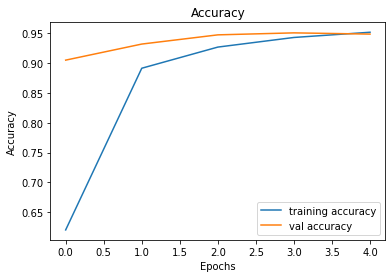

In [ ]:
#Plotting a graph for Accuracy vs Epochs

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

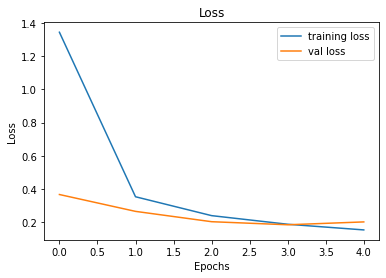

In [ ]:
#Plotting a graph for Loss vs Epochs

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

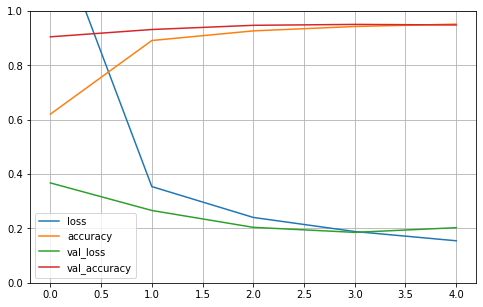

In [ ]:
#Plotting a graph for Training accuracy and Validation accuaracy vs Epochs

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Model Evaluation

In [ ]:
# Evaluating the model

model.evaluate(x_test, y_test)

395/395 [==============================] - 1s 4ms/step - loss: 0.2028 - accuracy: 0.9486


[0.20275896787643433, 0.9486144185066223]

## Predictions on test data

In [ ]:
#Making predictions on the test data

from PIL import Image 

y_test_pred = pd.read_csv('/content/drive/MyDrive/Traffic Sign Classification/GTSRB/GT-final_test.csv', sep = ';') #Getting Category labels and images from the csv file

labels = y_test_pred["ClassId"].values
imgs = y_test_pred["Filename"].values

data=[]
counter = 0                                                                     #Counter to helpkeep track of the loop
IMG_SIZE = 35

for img in imgs:                                                                #Loading and processing the images into an array
    try:

        filepath = test_data_dir + '/'+ img
        IMG_SIZE = 35
        img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        reshaped_array = new_array.reshape(IMG_SIZE, IMG_SIZE, 1)
        data.append(reshaped_array)
        
        counter += 1
        print("Count = {}".format(counter))

    except:
        print("Error in" +img)

x_test_pred=np.array(data)

#Making predictions

predicted = np.argmax(model.predict(x_test_pred),axis= -1)

Streaming output truncated to the last 5000 lines.
Count = 7633
Count = 7634
Count = 7635
Count = 7636
Count = 7637
Count = 7638
Count = 7639
Count = 7640
Count = 7641
Count = 7642
Count = 7643
Count = 7644
Count = 7645
Count = 7646
Count = 7647
Count = 7648
Count = 7649
Count = 7650
Count = 7651
Count = 7652
Count = 7653
Count = 7654
Count = 7655
Count = 7656
Count = 7657
Count = 7658
Count = 7659
Count = 7660
Count = 7661
Count = 7662
Count = 7663
Count = 7664
Count = 7665
Count = 7666
Count = 7667
Count = 7668
Count = 7669
Count = 7670
Count = 7671
Count = 7672
Count = 7673
Count = 7674
Count = 7675
Count = 7676
Count = 7677
Count = 7678
Count = 7679
Count = 7680
Count = 7681
Count = 7682
Count = 7683
Count = 7684
Count = 7685
Count = 7686
Count = 7687
Count = 7688
Count = 7689
Count = 7690
Count = 7691
Count = 7692
Count = 7693
Count = 7694
Count = 7695
Count = 7696
Count = 7697
Count = 7698
Count = 7699
Count = 7700
Count = 7701
Count = 7702
Count = 7703
Count = 7704
Count = 7705


# Model Evaluation

## Accuracy of the model

In [ ]:
#Accuracy with the Test data

print('Test Data accuracy: ', accuracy_score(labels, predicted)*100)

Test Data accuracy:  89.50118764845605


## Report for the trained model

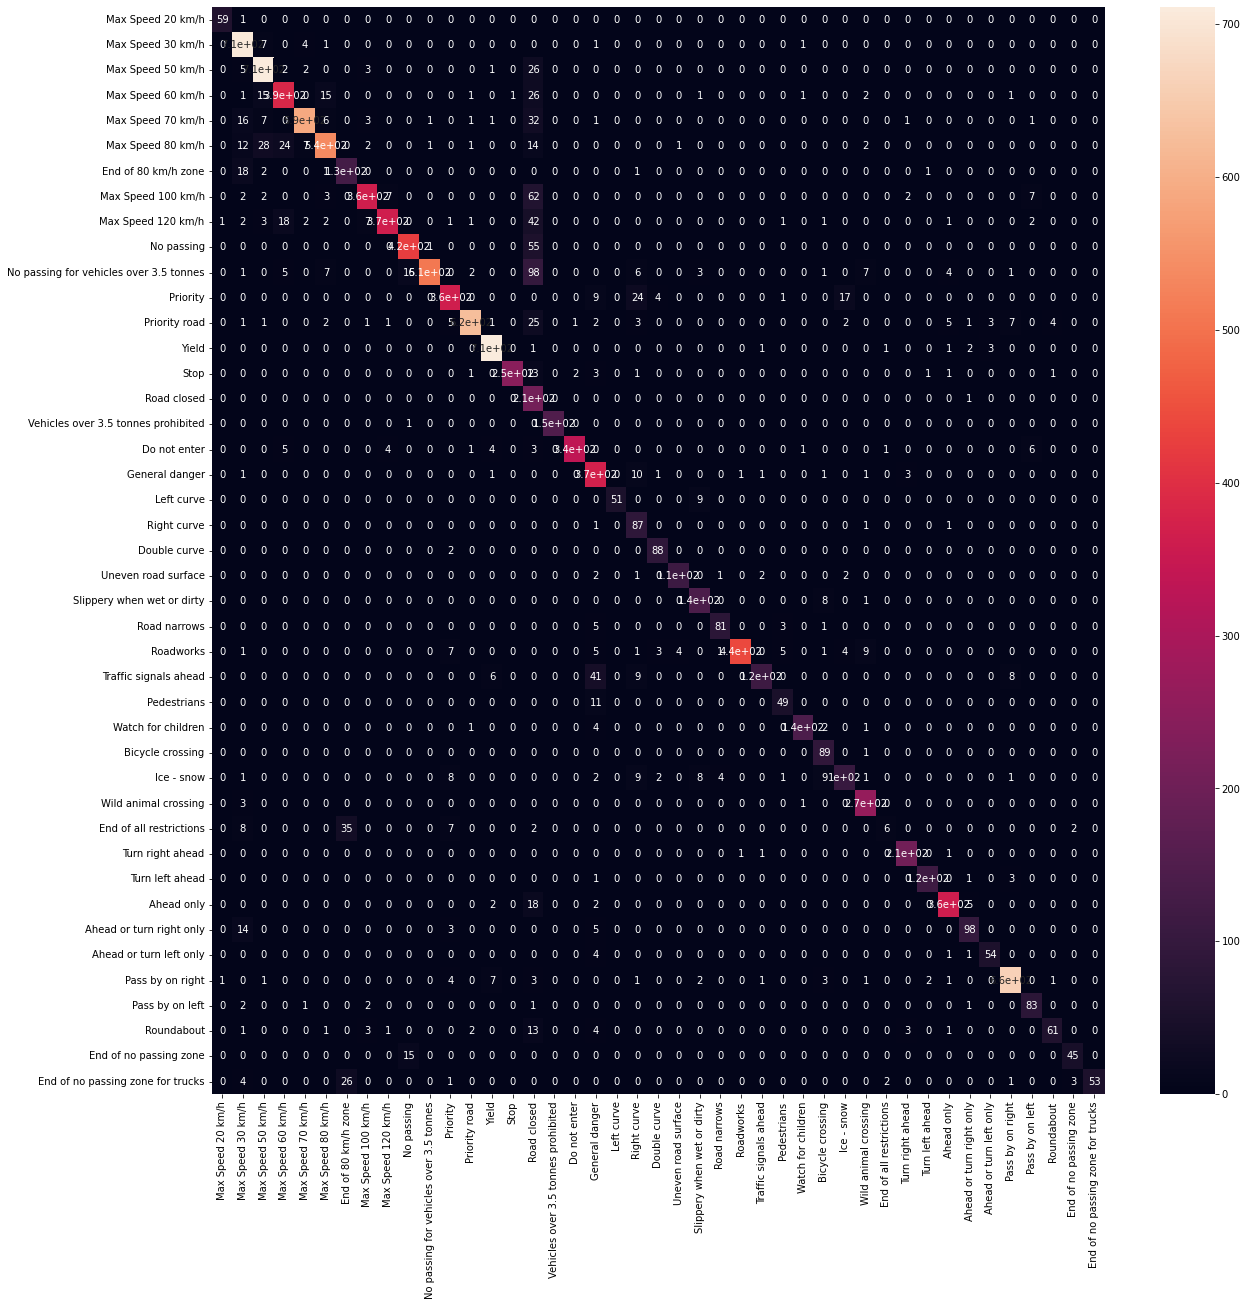

In [ ]:
#Confusion Matrix

cf = confusion_matrix(labels, predicted)
df_cm = pd.DataFrame(cf, index = category_names,  columns = category_names)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [ ]:
#Classification Report

print(classification_report(labels, predicted))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        60
           1       0.88      0.98      0.93       720
           2       0.92      0.95      0.93       750
           3       0.88      0.86      0.87       450
           4       0.97      0.89      0.93       660
           5       0.93      0.85      0.89       630
           6       0.68      0.85      0.75       150
           7       0.95      0.81      0.87       450
           8       0.97      0.81      0.88       450
           9       0.93      0.88      0.91       480
          10       0.99      0.77      0.87       660
          11       0.91      0.87      0.89       420
          12       0.98      0.91      0.94       690
          13       0.97      0.99      0.98       720
          14       1.00      0.91      0.95       270
          15       0.33      1.00      0.49       210
          16       1.00      0.99      1.00       150
          17       0.99    

# Visualizing the results

Comparing the actual ouput versus the predicted output on random images from test dataset

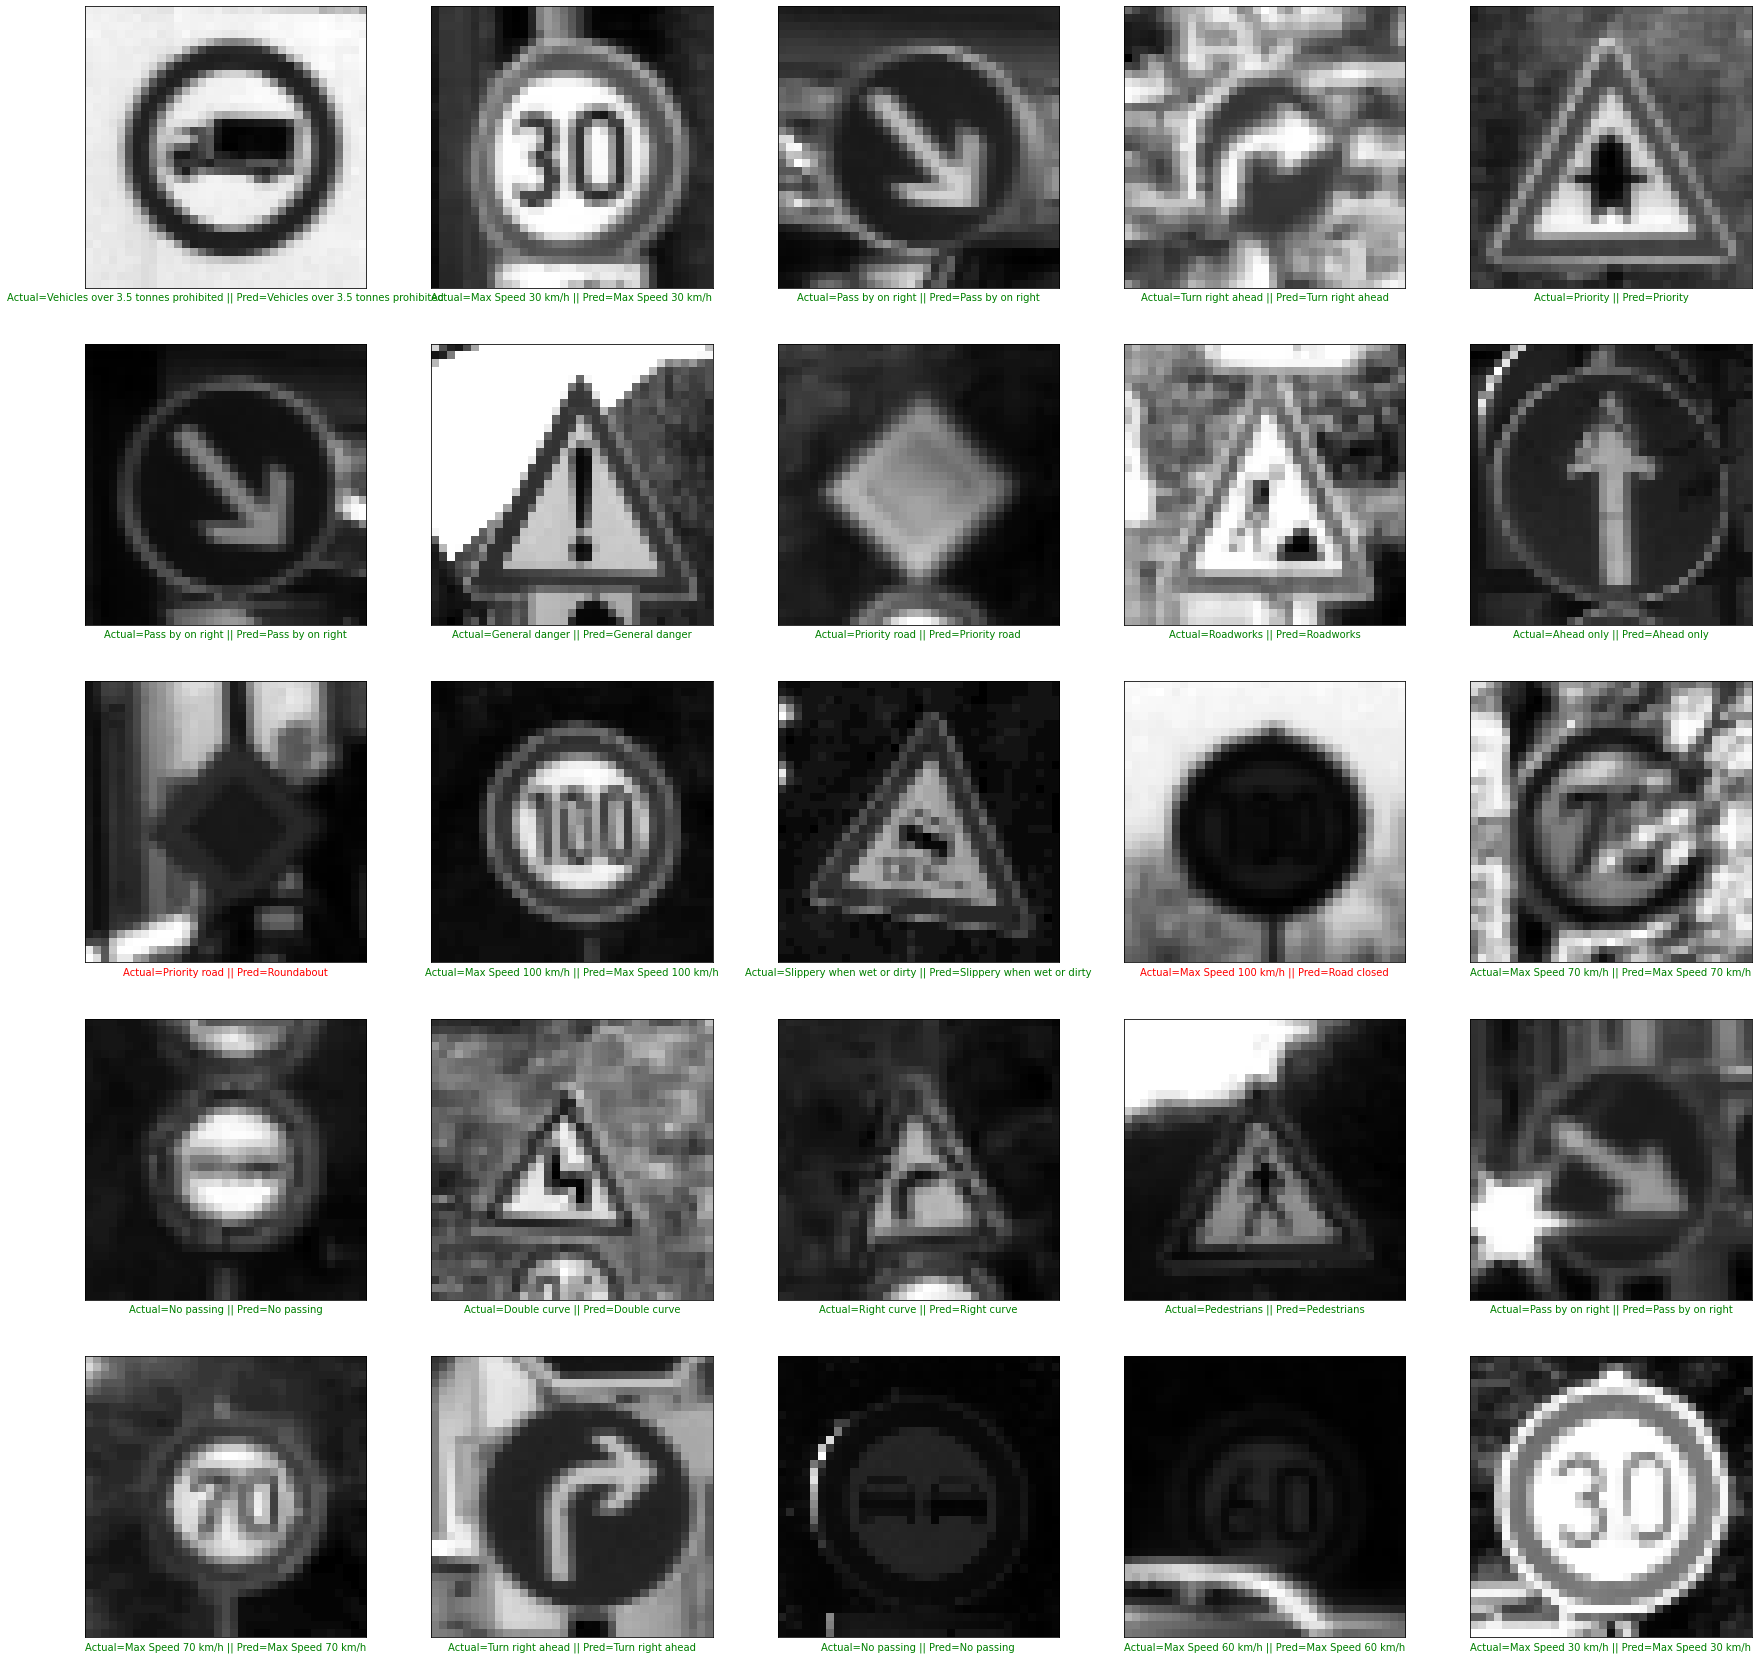

In [ ]:
plt.figure(figsize = (30, 30))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = predicted[start_index + i]
    actual = labels[start_index + i]

    predicted_label = category_names[prediction]
    actual_label = category_names[actual]

    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.xlabel('Actual={} || Pred={}'.format(actual_label, predicted_label), color = col)
    plt.imshow(x_test_pred[start_index + i][:,:,0], cmap="gray")
plt.show()